In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
from collections import Counter

In [3]:
df=pd.read_csv("application_data.csv")
df.shape

(307511, 122)

In [4]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,SK_ID_CURR[int64],Mean (sd) : 278180.5 (102790.2)min < med < max:100002.0 < 278202.0 < 456255.0IQR (CV) : 177997.0 (2.7),"307,511 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACK0lEQVR4nO3Yu47aUBRG4X0Mgw4X2eIS6GhSRkphiYYHSJmHzSsgUaSmSJOKDsmyjHAGYRGnmSbNDL4MzC+tr2ZztsU6SODKsjTgowsevQBwi+6jF0C7nHN9M+vVHL+UZfnc5j5teTPUhg8emNnfmrNN51XPbjLrJ5PJtyiKhnWGj8dj6pz7UTfW97wkr4bqnOtPp9PvYRiOq556vV6f8jz/PBqNfgdBUNxzXvXspnsXReHN7Mtqtfo5m82OVWazLPObzWaeJMnMOVdp9sW7XpK3vlF7YRiO1+v1cxRF5yoH7/f78W63+xTH8a/FYpFWmW06r3p2S3sPvPfFfD7/U2U2z/Onoii+LpfLTqfTqfRZmzW/JNvtdpwkSc/MaoVqZmZRFJ2rPniapn0zs+FwWHm26bzq2W3tXcflcul67wdxHJ/vfUlevLo7P6bwn0dcklvw9xQkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokdG95UZZlvuobn04nb2aW57k/HA6De86rnq26d9P5W/r6ByCxP3C55mxvAAAAAElFTkSuQmCC"">",0(0.0%)
2,TARGET[int64],Mean (sd) : 0.1 (0.3)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.3),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtUlEQVR4nO3XTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL15s9JyzAX/dx7sPANyjuvWCu7dmVhfuP+Wc18JZ4MvVUN297ft+F0LoSpYvy3Jw9z2x4lm3vqh1CKEbx3GNMW6PLE4pNdM0dfM812ZGqHjKzavfzCzGuA3DcCzY3xbMAN/wMwUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJ1bsPgP/D3VszqwvHTznn9aeHhIqXcPe27/tdCKErmV+W5eDu+59iJVS8Sh1C6MZxXGOM2yODKaVmmqZunufazAgVvy/GuA3DcCwYba895GcKEggVEu66+lNKzaOLU0rN+XyuzCy4+8MHg5xwuVyq0lZuvfMJdyVOfRsPMKsAAAAASUVORK5CYII="">",0(0.0%)
3,NAME_CONTRACT_TYPE[object],1. Cash loans2. Revolving loans,"278,232 (90.5%)29,279 (9.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQWrDMBRF0a9iQjKRMAYvxovIYrsI7cYYa9CETNRB5yGW3JfWumdu+IOLIcHP5ZwNUHBmdjGz07sPwb/xyDnfSh7shmG4eu/7vS/CMaWUFufcZ0lwnfe+n6bpFkK4/8ZxOI51Xc8xxn6e55OZbY/NzCyEcB/H8Wv363BEl9IHP/a8AniG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmc7s56O4dx+Cv6+2ky6ltMQYe6v4KA7tSCktZvYoeZbBC7YqHrw4pnxQqX2zFVeO9lRN+WpmXWhP8ZSvdtaF9tRO+fgFi5fxpy5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCme8jH/w1ZVU76aWRfaw+AFMt8KW2rfOfaTaQAAAABJRU5ErkJggg=="">",0(0.0%)
4,CODE_GENDER[object],1. F2. M3. XNA,"202,448 (65.8%)105,059 (34.2%)4 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmUlEQVR4nO3bQW6CUBSF4fMIsXUCISQsod0Di+hiuwgW0T0QwhtU64QOHBjTKT3P3v7fCq7xjwbjSdu2CXCoSh+A/yNJOko6lD4EP1y2bTuVPmJPdd/3b03TdKUPwb2c85JSeo8UXN00TTeO46lt23PpY3C1ruvzNE3dPM8HSXFik6S2bc/DMHyWPgZ3jqUP2BsPCLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDTS1d/z9V+hDcRH0/6pzzMk1Tp4D/n/rLcs6LpEvpO/bEBuFxhdsgJKZ8cIn6yRbuUyGCkOuqiMukCMKtq6IukyKIuq7iyfoB8aMubIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GATbl0V6bVEE3JdFXGZFAEbBNiwroINDwiwITbYVCml15QST3D4dZWkF0lPpQ9BfHyNwobYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoNNJelD0lfpQxAf6yrY8DUKm2/nRXM6yWPU4wAAAABJRU5ErkJggg=="">",0(0.0%)
5,FLAG_OWN_CAR[object],1. N2. Y,"202,924 (66.0%)104,587 (34.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6B

In [5]:
# drop columns with over 50% missing and the ID column
drop_col = ['OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG',
            'COMMONAREA_AVG', 'ELEVATORS_AVG','ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
            'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 
            'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE','ELEVATORS_MODE', 
            'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE','LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
            'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI','BASEMENTAREA_MEDI', 
            'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI','COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
            'FLOORSMAX_MEDI','FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI', 
            'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
            'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE','SK_ID_CURR']

df.drop(columns=drop_col,inplace=True)
df.shape

(307511, 72)

'NAME_CONTRACT_TYPE': cat, onehot
'CODE_GENDER': cat, onehot
'FLAG_OWN_CAR': cat, onehot
'FLAG_OWN_REALTY': cat, onehot
'CNT_CHILDREN': ord, combine less frequent
'AMT_INCOME_TOTAL': num, log transform
'AMT_CREDIT': num, log transform
'AMT_ANNUITY': num, log transform, impute from AMT_CREDIT, add missing indicator
'AMT_GOODS_PRICE': num, log transform, impute from AMT_CREDIT, add missing indicator
'NAME_TYPE_SUITE': cat, fillna with "missing", onehot
'NAME_INCOME_TYPE': cat, onehot
'NAME_EDUCATION_TYPE': cat, onehot
'NAME_FAMILY_STATUS': cat, onehot
'NAME_HOUSING_TYPE':cat, onehot
'REGION_POPULATION_RELATIVE': num
'DAYS_BIRTH': num
'DAYS_EMPLOYED': num, error numbers
'DAYS_REGISTRATION': num
'DAYS_ID_PUBLISH': num
'FLAG_MOBIL': cat
'FLAG_EMP_PHONE': cat
'FLAG_WORK_PHONE': cat
'FLAG_CONT_MOBILE': cat
'FLAG_PHONE': cat
'FLAG_EMAIL': cat
'OCCUPATION_TYPE': cat, fillna with 'other', onehot
'CNT_FAM_MEMBERS': ord, combine less frequent, impute from CNT_CHILDREN+1
'REGION_RATING_CLIENT': num
'REGION_RATING_CLIENT_W_CITY': num
'WEEKDAY_APPR_PROCESS_START': cat, onehot
'HOUR_APPR_PROCESS_START'; cat, onehot
'REG_REGION_NOT_LIVE_REGION': cat
'REG_REGION_NOT_WORK_REGION': cat
'LIVE_REGION_NOT_WORK_REGION': cat
'REG_CITY_NOT_LIVE_CITY': cat
'REG_CITY_NOT_WORK_CITY': cat
'LIVE_CITY_NOT_WORK_CITY': cat
'ORGANIZATION_TYPE': cat, onehot
'EXT_SOURCE_2': num, impute missing values, add missing indicator
'EXT_SOURCE_3': num, impute missing values, add missing indicator
'OBS_30_CNT_SOCIAL_CIRCLE': ord, add missing indicator
'DEF_30_CNT_SOCIAL_CIRCLE': ord, add missing indicator
'OBS_60_CNT_SOCIAL_CIRCLE': ord, add missing indicator
'DEF_60_CNT_SOCIAL_CIRCLE': ord, add missing indicator
'DAYS_LAST_PHONE_CHANGE': num, fillna with 0
'FLAG_DOCUMENT': cat
'AMT_REQ_CREDIT_BUREAU_HOUR': ord, add missing indicator
'AMT_REQ_CREDIT_BUREAU_DAY': ord, add missing indicator
'AMT_REQ_CREDIT_BUREAU_WEEK': ord, add missing indicator
'AMT_REQ_CREDIT_BUREAU_MON': ord, add missing indicator
'AMT_REQ_CREDIT_BUREAU_QRT': ord, add missing indicator
'AMT_REQ_CREDIT_BUREAU_YEAR': ord, add missing indicator

In [6]:
# group less frequent categories in CNT_CHILDREN
def clean_CNT_CHILDREN(s):
    if s>=3:
        return 3
    else:
        return s

df['CNT_CHILDREN']=df['CNT_CHILDREN'].apply(clean_CNT_CHILDREN)

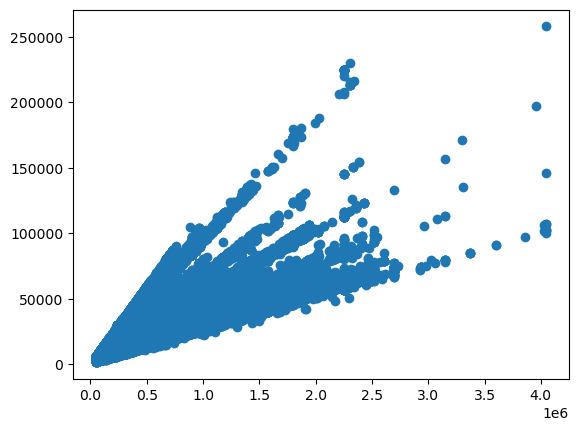

In [31]:
# use AMT_CREDIT to fill in AMT_ANNUITY
plt.scatter(df['AMT_CREDIT'],df['AMT_ANNUITY'])

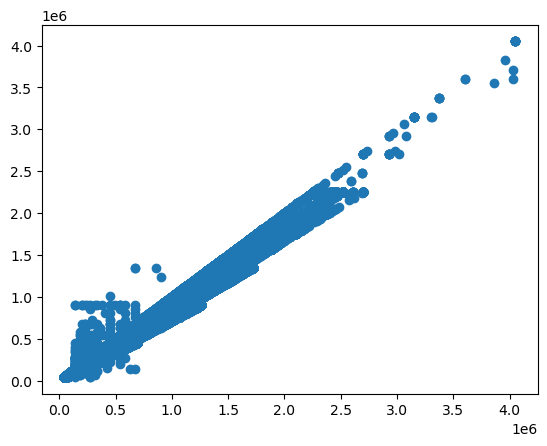

In [32]:
# use AMT_CREDIT to fill in AMT_GOODS_PRICE
plt.scatter(df['AMT_CREDIT'],df['AMT_GOODS_PRICE'])

In [37]:
# group less frequent categories in NAME_TYPE_SUITE
df['NAME_TYPE_SUITE'][df['NAME_TYPE_SUITE'].replace(Counter(df['NAME_TYPE_SUITE']))<2000]='Other'

C:\Users\chenx\AppData\Local\Temp\ipykernel_7144\740742380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NAME_TYPE_SUITE'][df['NAME_TYPE_SUITE'].replace(Counter(df['NAME_TYPE_SUITE']))<2000]='Other'


In [42]:
# group less frequent categories in CNT_FAM_MEMBERS
def clean_CNT_FAM_MEMBERS(s):
    if s<5:
        return s
    else:
        return 5
df['CNT_FAM_MEMBERS']=df['CNT_FAM_MEMBERS'].apply(clean_CNT_FAM_MEMBERS)

In [46]:
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna('unknown')

In [58]:
# group less frequent categories in DEF_30_CNT_SOCIAL_CIRCLE
def clean_DEF_30_CNT_SOCIAL_CIRCLE(s):
    if s>=4:
        return 4
    else:
        return s
df['DEF_30_CNT_SOCIAL_CIRCLE']=df['DEF_30_CNT_SOCIAL_CIRCLE'].apply(clean_DEF_30_CNT_SOCIAL_CIRCLE)

In [61]:
# Do something?
df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

OBS_30_CNT_SOCIAL_CIRCLE
0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: count, dtype: int64

In [62]:
# group less frequent categories in DEF_60_CNT_SOCIAL_CIRCLE
def clean_DEF_60_CNT_SOCIAL_CIRCLE(s):
    if s>=4:
        return 4
    else:
        return s
df['DEF_60_CNT_SOCIAL_CIRCLE']=df['DEF_60_CNT_SOCIAL_CIRCLE'].apply(clean_DEF_60_CNT_SOCIAL_CIRCLE)

In [63]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TARGET[int64],Mean (sd) : 0.1 (0.3)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.3),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtUlEQVR4nO3XTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL15s9JyzAX/dx7sPANyjuvWCu7dmVhfuP+Wc18JZ4MvVUN297ft+F0LoSpYvy3Jw9z2x4lm3vqh1CKEbx3GNMW6PLE4pNdM0dfM812ZGqHjKzavfzCzGuA3DcCzY3xbMAN/wMwUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJ1bsPgP/D3VszqwvHTznn9aeHhIqXcPe27/tdCKErmV+W5eDu+59iJVS8Sh1C6MZxXGOM2yODKaVmmqZunufazAgVvy/GuA3DcCwYba895GcKEggVEu66+lNKzaOLU0rN+XyuzCy4+8MHg5xwuVyq0lZuvfMJdyVOfRsPMKsAAAAASUVORK5CYII="">",0(0.0%)
2,NAME_CONTRACT_TYPE[object],1. Cash loans2. Revolving loans,"278,232 (90.5%)29,279 (9.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQWrDMBRF0a9iQjKRMAYvxovIYrsI7cYYa9CETNRB5yGW3JfWumdu+IOLIcHP5ZwNUHBmdjGz07sPwb/xyDnfSh7shmG4eu/7vS/CMaWUFufcZ0lwnfe+n6bpFkK4/8ZxOI51Xc8xxn6e55OZbY/NzCyEcB/H8Wv363BEl9IHP/a8AniG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmc7s56O4dx+Cv6+2ky6ltMQYe6v4KA7tSCktZvYoeZbBC7YqHrw4pnxQqX2zFVeO9lRN+WpmXWhP8ZSvdtaF9tRO+fgFi5fxpy5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCme8jH/w1ZVU76aWRfaw+AFMt8KW2rfOfaTaQAAAABJRU5ErkJggg=="">",0(0.0%)
3,CODE_GENDER[object],1. F2. M3. XNA,"202,448 (65.8%)105,059 (34.2%)4 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmUlEQVR4nO3bQW6CUBSF4fMIsXUCISQsod0Di+hiuwgW0T0QwhtU64QOHBjTKT3P3v7fCq7xjwbjSdu2CXCoSh+A/yNJOko6lD4EP1y2bTuVPmJPdd/3b03TdKUPwb2c85JSeo8UXN00TTeO46lt23PpY3C1ruvzNE3dPM8HSXFik6S2bc/DMHyWPgZ3jqUP2BsPCLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDTS1d/z9V+hDcRH0/6pzzMk1Tp4D/n/rLcs6LpEvpO/bEBuFxhdsgJKZ8cIn6yRbuUyGCkOuqiMukCMKtq6IukyKIuq7iyfoB8aMubIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GATbl0V6bVEE3JdFXGZFAEbBNiwroINDwiwITbYVCml15QST3D4dZWkF0lPpQ9BfHyNwobYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAYbYoNNJelD0lfpQxAf6yrY8DUKm2/nRXM6yWPU4wAAAABJRU5ErkJggg=="">",0(0.0%)
4,FLAG_OWN_CAR[object],1. N2. Y,"202,924 (66.0%)104,587 (34.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOklEQVR4nO3bMWrDQBRF0a8gTNzMIARajBaRxWYRsxshNEVs3EwKF8GkNW+cl3tW8I0vAhu9obUWgMIQEeeIOPU+BL/cWmuX3kc80zjP80dKaep9CB7VWvdhGD6dghtTStO6rpec87X3Mbg7juO9lDJt23aKCJ/YIiJyztdlWb56H4MH594HPNtb7wPwfxAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CAzRtxf1ut9CH64fh9jrXUvpUxh+LLeX1Zr3SPi1vuOZ2Lw8rrsBi8DUz6ouD7Z7J4KDiynfI4zOAd2Uz7XGZwD1ykfv6xfEH/qQobYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZuymf02dxYznlc5zBOWDwAplvCltq30b8rewAAAAASUVORK5CYII="">",0(0.0%)
5,FLAG_OWN_REALTY[object],1. Y2. N,"213,312 (69.4%)94,199 (30.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bQarCMBSF4Rsp8pwklEIX00W4WBeR3ZTSDFSc5A3e/Fk6OOGS/1vBBX8FS0+otRqgEMzsZmbX1ofgsE+t9dX6iDOGaZruMcax9SE4ppSyhRAeHoMbYozjsiyvlNK79TH4377vPznncV3Xq5n5i83MLKX0nuf52foYHHJrfcBZl9YHoB/EBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIDGZ/L+W1PgTfef+chlLKlnMezfFLeT0ppWxm9ml9xxkMXvxxO3gJTPmg4v2Xze23vEeup3yeZ209cjvl8z5r65H3KR//oB3hoS5kiA0yxAYZYoMMsUGG2CBDbJAhNsgQ

<AxesSubplot: >

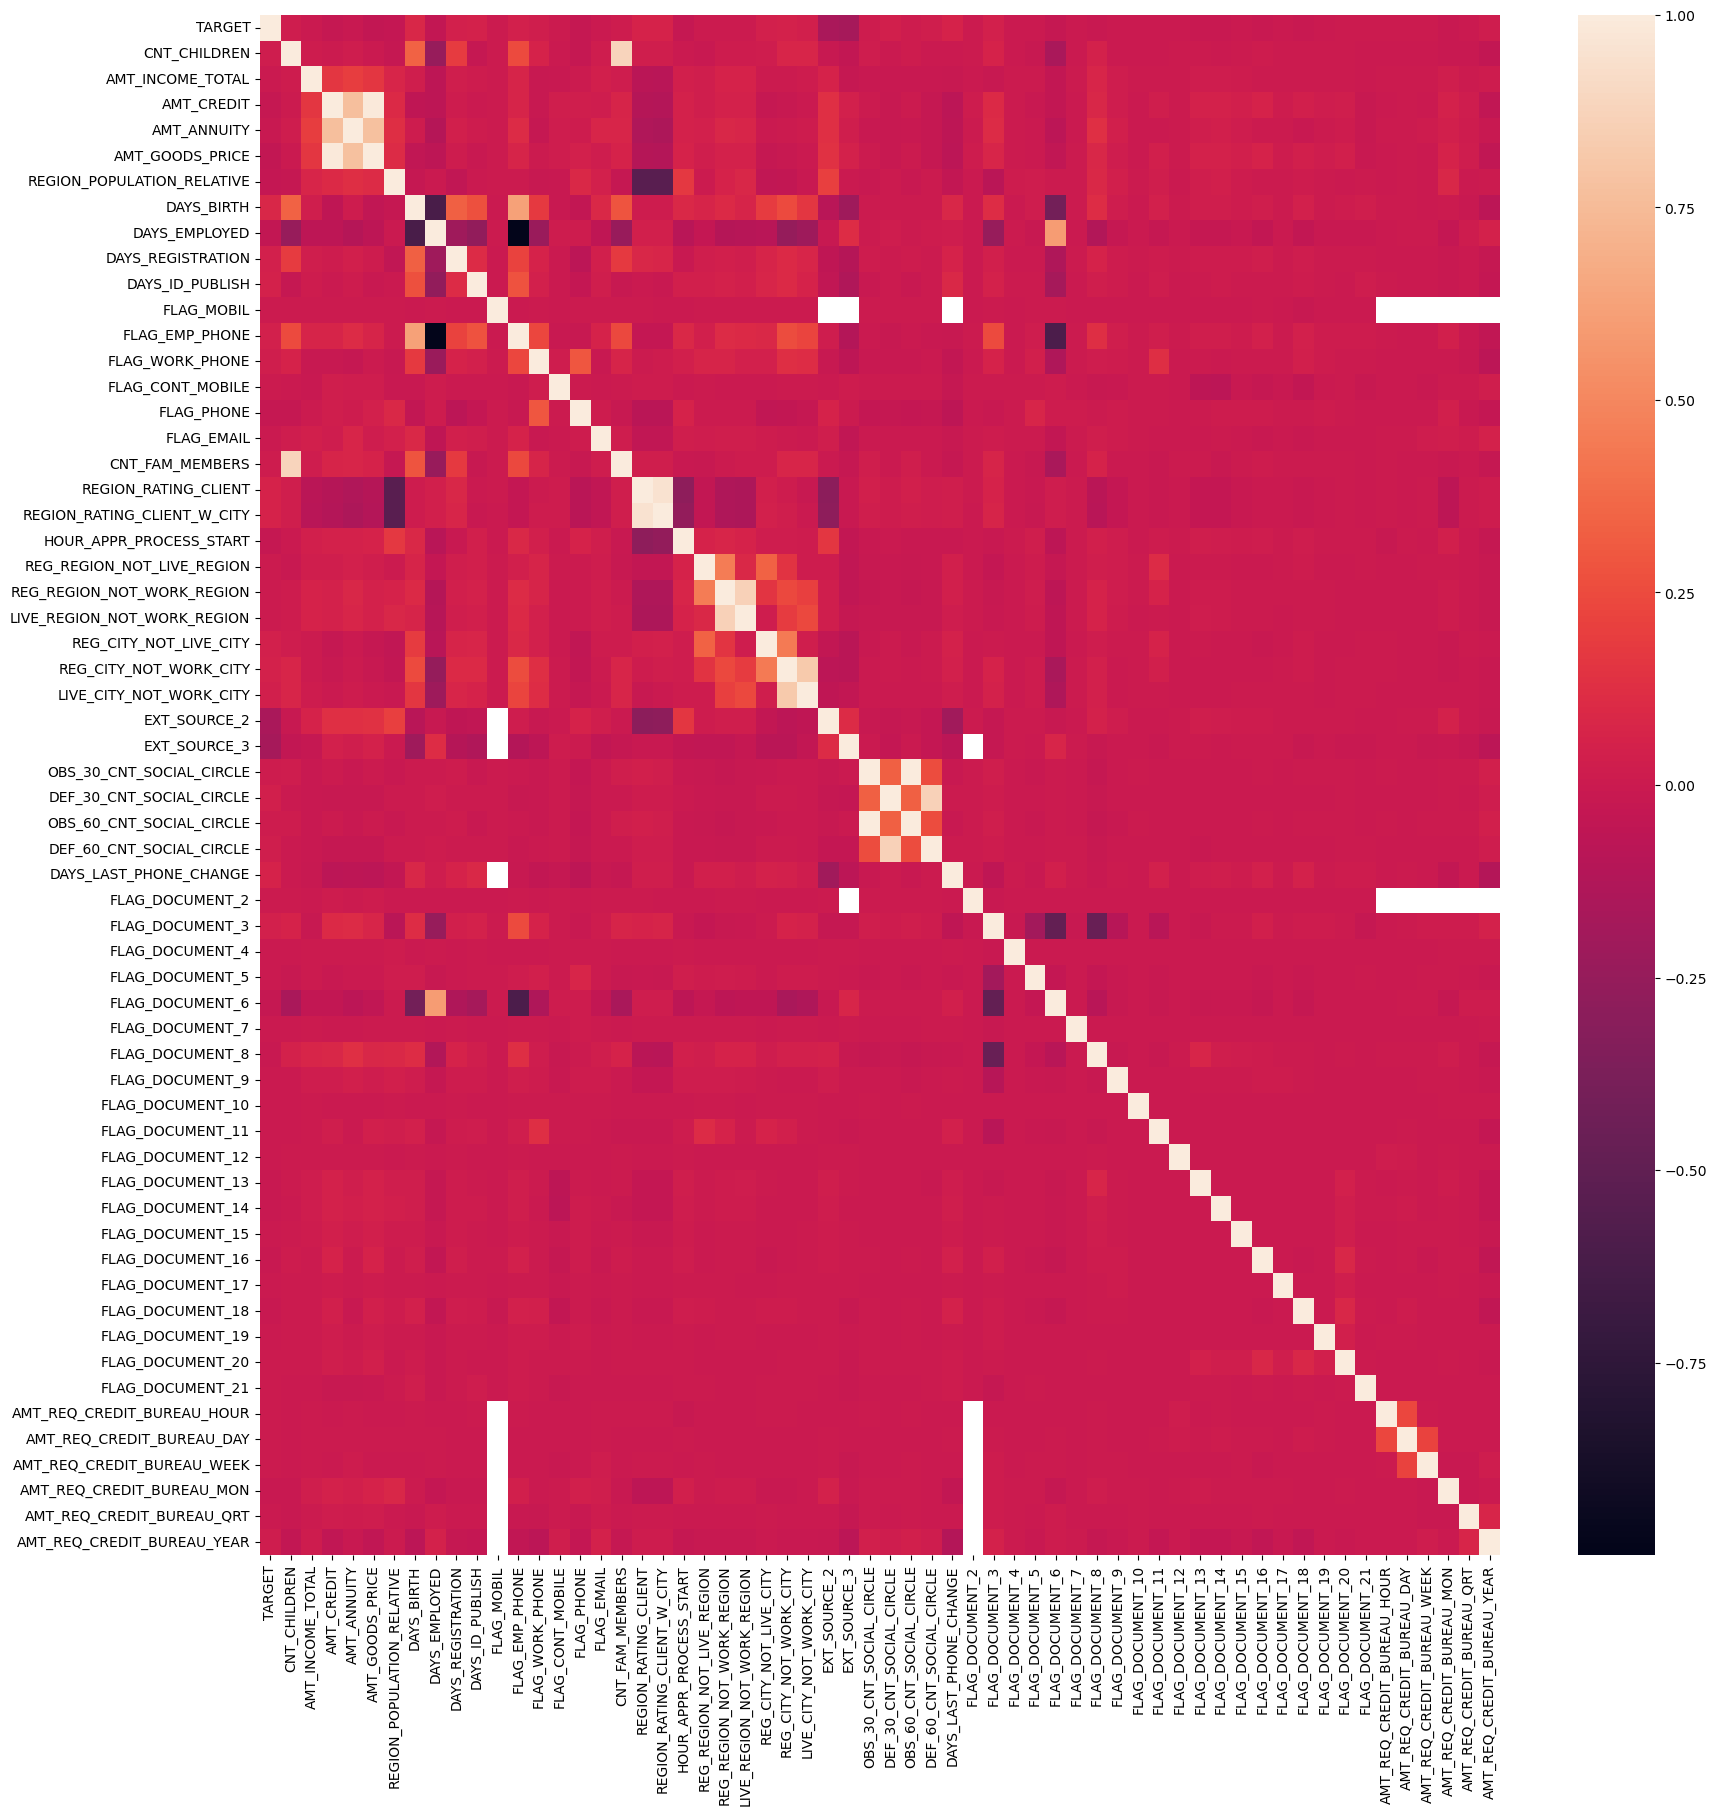

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True))

In [55]:
# need to clean this
df['DAYS_EMPLOYED'][df['DAYS_EMPLOYED']>300000]

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64